## 6.5: Unsupervised Machine Learning: Clustering

### Contents
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing Libraries & Dataset

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating path to import dataset

path = r'C:\Users\aleen\OneDrive\Desktop\Aleena\CF assignments\Data Immersion\Achievement 6\Climate Change\ClimateChange'

In [4]:
# Importing dataset climate_clean as df_climate

df =  pd.read_csv(os.path.join(path, 'climate_change.csv'), index_col = False)

In [5]:
df.shape

(284852, 5)

In [6]:
df.head()

,Unnamed: 0,country_name,months,year,temp_change
0,0,Afghanistan,January,1961,0.777
1,1,Afghanistan,February,1961,-1.743
2,2,Afghanistan,March,1961,0.516
3,3,Afghanistan,April,1961,-1.709
4,4,Afghanistan,May,1961,1.412


In [13]:
df_1 = df.drop(['country_name', 'months'], axis=1)

In [16]:
df_1.head()

,Unnamed: 0,year,temp_change
0,0,1961,0.777
1,1,1961,-1.743
2,2,1961,0.516
3,3,1961,-1.709
4,4,1961,1.412


### The Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\aleen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aleen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aleen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aleen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aleen\anaconda3\lib\site-packages\sklearn\clust

[-1926090068235804.0,
 -481527339187627.2,
 -214042108812099.97,
 -120432073504982.97,
 -77053596285709.62,
 -53521790506068.54,
 -39339730693836.93,
 -30126075860714.72,
 -23820034626681.883]

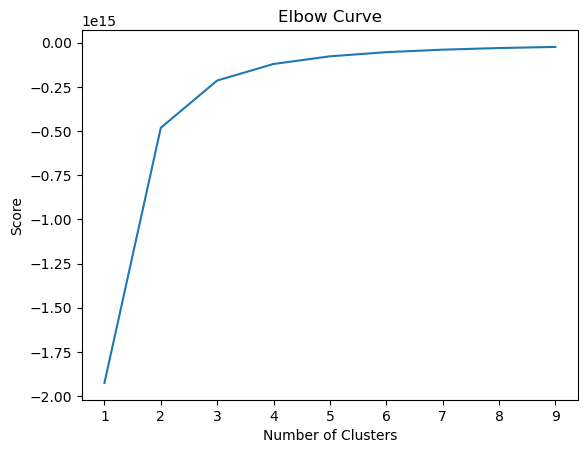

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### k-means Clustering

In [28]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_init = 1)

In [29]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

KMeans(n_clusters=3, n_init=1)

In [30]:
df_1['clusters'] = kmeans.fit_predict(df_1)

In [32]:
df_1.head()

,Unnamed: 0,year,temp_change,clusters
0,0,1961,0.777,0
1,1,1961,-1.743,0
2,2,1961,0.516,0
3,3,1961,-1.709,0
4,4,1961,1.412,0


In [34]:
df_1['clusters'].value_counts()

0    95691
2    94950
1    94211
Name: clusters, dtype: int64

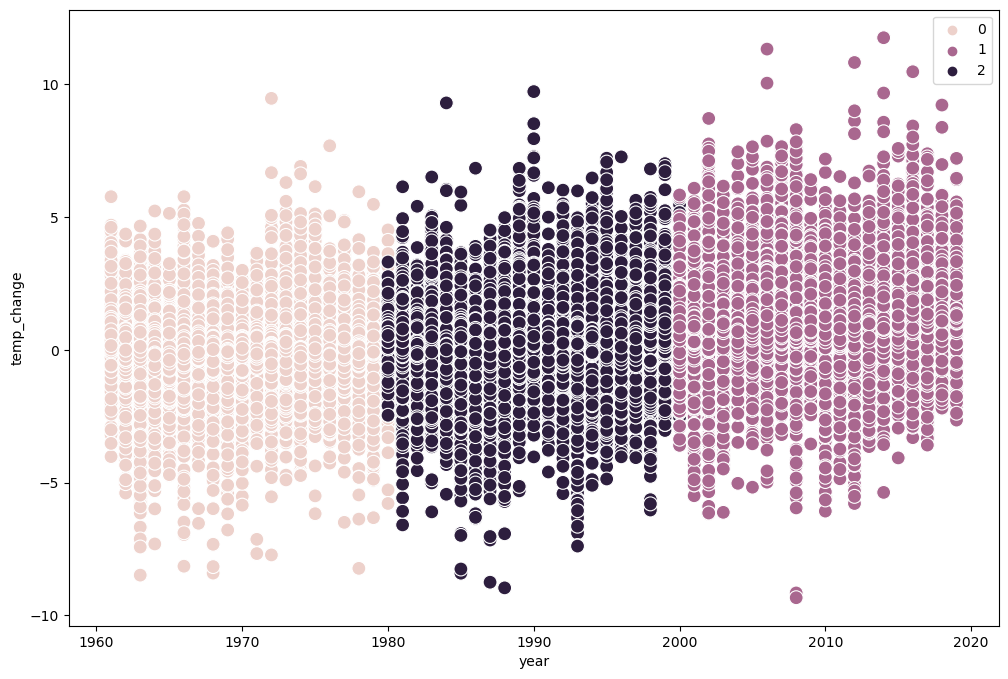

In [35]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['year'], y=df_1['temp_change'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year') # Label x-axis.
plt.ylabel('temp_change') # Label y-axis.
plt.show()

In [37]:
df_1.loc[df_1['clusters'] == 2, 'cluster'] = 'dark purple'
df_1.loc[df_1['clusters'] == 1, 'cluster'] = 'purple'
df_1.loc[df_1['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
df_1.groupby('clusters').agg({'temp_change':['mean', 'median']})

temp_change         
                mean   median
clusters                     
0          -0.002402 -0.01700
1           1.031457  0.94902
2           0.391377  0.35100

The k-means clustering model has showed interesting insight regarding temperature change over the years. However, it would be great to include the temperature change among different regions in the analysis too.